# 9.2 Gaussian discriminant analysis

## 9.2.6 Fischer's linear discriminant analysis *

> Author:Srikar-Reddy-Jilugu(@always-newbie161)  
> https://github.com/probml/pmtk3/blob/master/demos/fisherDiscrimVowelDemo.m

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat

# import io, requests
# url = "https://github.com/probml/probml-data/blob/main/data/vowelTrain.mat?raw=true"
# r = requests.get(url, allow_redirects=True)
# rawdata = io.BytesIO(r.content)
rawdata = 'vowelTrain.mat'

data = loadmat(rawdata)
X = data['Xtrain'] # shape (528, 10)
y = data['ytrain'].squeeze() # shape (528,)

nsamples, ndims = X.shape
classes = np.unique(y)
nclasses = len(classes)

muC = np.stack([X[y == c].mean(axis=0) for c in classes], axis=0) # shape (11, 10)
nsamples, ndims, nclasses

(528, 10, 11)

### Figure 9.5: (a) PCA projection of vowel data to 2d. (b) FLDA projection of vowel data to 2d. We see there is better class separation in the FLDA case. Adapted from Figure 4.11 of [HTF09].

> - [HTF09] The Elements of Statistical Learning 2E, Hastie et al. (2009), Figure 4.4
> - [DHS01] Pattern Classification 2E, Duda et al. (2001), 4.10 Fisher Linear Discriminant

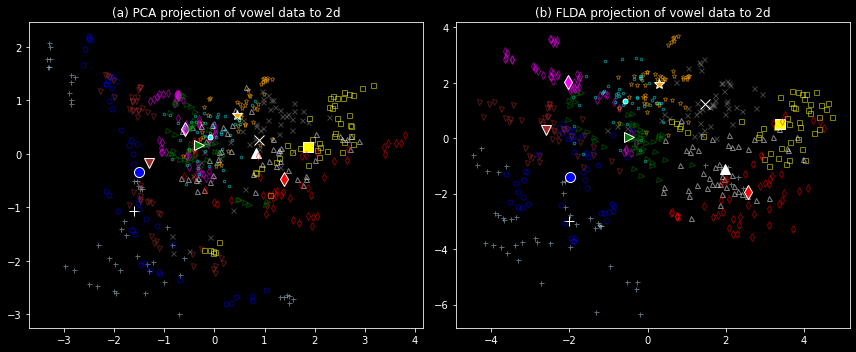

In [4]:
# n_components
K = 2

# PCA projection
from sklearn.decomposition import PCA
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X, y)
X_pca[:,1] *= -1 # make it look like the Hastie figure
muC2d_pca = pca.transform(muC)
muC2d_pca[:,1] *= -1 # make it look like the Hastie figure

# Fischer's LDA projection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
flda = LinearDiscriminantAnalysis(n_components=K)
X_flda = flda.fit_transform(X, y)
muC2d_flda = flda.transform(muC)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('(a) PCA projection of vowel data to 2d')
ax2.set_title('(b) FLDA projection of vowel data to 2d')

colors = ['lightblue', 'blue', 'brown', 'magenta', 'orange', 'cyan', 'gray', 'yellow', 'white', 'red', 'green']
symbols = "+ovd*.xs^d><ph"

for c in range(nclasses):
    ndx = np.where(y == (c + 1))
    ax1.plot(X_pca[ndx, 0], X_pca[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none', alpha=0.5)
    ax1.plot(muC2d_pca[c, 0], muC2d_pca[c, 1], symbols[c], color=colors[c], markersize=10, markeredgecolor='white')
    ax2.plot(X_flda[ndx, 0], X_flda[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none', alpha=0.5)
    ax2.plot(muC2d_flda[c, 0], muC2d_flda[c, 1], symbols[c], color=colors[c], markersize=10, markeredgecolor='white')

fig.tight_layout()


### FLDA projection of vowel data to 2d with `eigen` solver

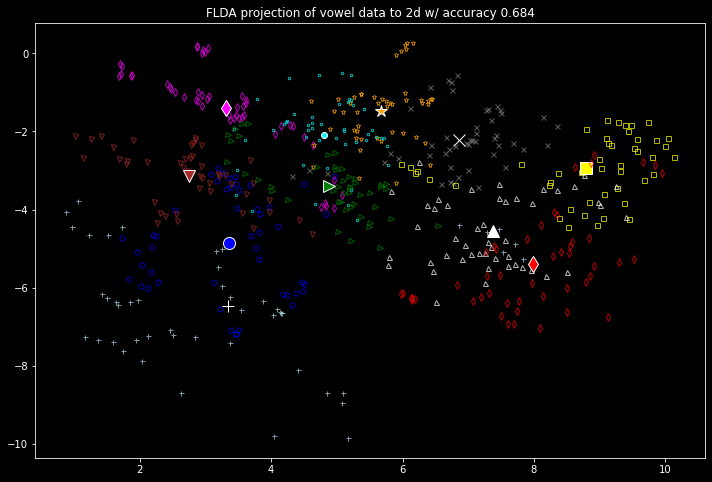

In [6]:
# Fischer's LDA projection w/ solver='eigen'
clf = LinearDiscriminantAnalysis(solver='eigen', n_components=K)
X_trans = clf.fit_transform(X, y)
muC_trans = clf.transform(muC)

_, ax = plt.subplots(figsize=(12,8))

for c in range(nclasses):
    ndx = np.where(y == (c + 1))
    ax.plot(X_trans[ndx, 0], X_trans[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none', alpha=0.7)
    ax.plot(muC_trans[c, 0], muC_trans[c, 1], symbols[c], color=colors[c], markersize=12, markeredgecolor='white')
ax.set_title(f"FLDA projection of vowel data to 2d w/ accuracy {clf.score(X, y):.3f}");